## Problem Statement
As a part of its bigger project of Electrifying Indian Mobility, Indian government and the constituent state authorities have been actively promoting the adoption of Electric Vehicles (EVs) with the help of a range of policy frameworks and incentives, aiming to reduce the vehicular pollution and boosting a sustainable and eco-friendly transportation ecosystem. As per the current scenario, the effectiveness and focus of these incentives vary significantly across different states. For a new entrant in the EV market, understanding these variations is crucial for developing targeted strategies that align with the regional policies and maximize the market penetration.
Here, in this segment, our primary objective will be to analyse state-wise policies and incentives related to EV adoption to identify distinct market segments. The goal is to uncover the insights that can contribute to the strategic decision-making for entering and expanding in the Indian Market. Our analysis will be specifically dedicated to answer the following questions:
1.	How do different States in India vary in terms of the incentives and policies offered to promote EV adoption?
2.	What are the common characteristics between the states that offer substantial support for EVs and those that provide minimal incentives?
3.	How can these insights be used to develop targeted market entry and expansion strategies for a new EV company?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## The Data

In [2]:
df = pd.read_csv("EV_final.csv")
df

,State,State_Code,2W_22,3W_22,4W_22,Total_22,2W_23,3W_23,4W_23,Total_23,...,4W_24,Total_24,Capital_subsidy_2W,Capital_subsidy_4W,Scrapping_Incentives,Other_Incentives,SGST_Rem,Motor_Vehicle_Tax_Exe,Registration_Fee_Exe,Road_Tax_Exe
0,Andaman & Nicobar Islands,AN,0,0,21,21,17,0,2,19,...,11,31,0,0,0,0,No,No,No,No
1,Andhra Pradesh & Telangana,AP&TS,13647,553,473,14673,29492,1288,1042,31822,...,1884,36205,0,0,0,0,100%,No,100%,100%
2,Arunachal Pradesh,AR,0,0,0,0,1,0,1,2,...,29,34,0,0,0,0,No,No,No,No
3,Assam,AS,718,19698,11,20427,2074,43073,110,45257,...,292,63692,20000,150000,0,RI 15%,No,No,100%,100%
4,Bihar,BR,4750,23445,80,28275,10907,51470,215,62592,...,731,96454,20000,150000,0,0,No,No,No,No
5,Chandiagrh,CH,288,529,125,942,1510,1874,474,3858,...,1138,6482,0,0,3500,RI 15%,No,No,No,No
6,Chhattisgarh,CG,4415,1993,115,6523,20194,6976,517,27687,...,1767,42095,0,0,0,0,No,No,No,No
7,Dadra and Nagar Haveli and Diu and Daman,DD,30,2,5,37,103,23,20,146,...,49,215,0,0,0,0,No,No,No,No
8,Delhi,DL,14256,17913,1706,33875,36810,22624,4026,63460,...,6220,74515,30000,150000,5000-7000,IS 5%,No,No,100%,100%
9,Goa,GA,1444,15,335,1794,6425,49,684,7158,...,1029,10956,30000,150000,10000,0,No,No,No,No


In [3]:
df.columns

Index(['State', 'State_Code', '2W_22', '3W_22', '4W_22', 'Total_22', '2W_23',
       '3W_23', '4W_23', 'Total_23', '2W_24', '3W_24', '4W_24', 'Total_24',
       'Capital_subsidy_2W', 'Capital_subsidy_4W', 'Scrapping_Incentives',
       'Other_Incentives', 'SGST_Rem', 'Motor_Vehicle_Tax_Exe',
       'Registration_Fee_Exe', 'Road_Tax_Exe'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   State                  35 non-null     object
 1   State_Code             35 non-null     object
 2   2W_22                  35 non-null     int64 
 3   3W_22                  35 non-null     int64 
 4   4W_22                  35 non-null     int64 
 5   Total_22               35 non-null     int64 
 6   2W_23                  35 non-null     int64 
 7   3W_23                  35 non-null     int64 
 8   4W_23                  35 non-null     int64 
 9   Total_23               35 non-null     int64 
 10  2W_24                  35 non-null     int64 
 11  3W_24                  35 non-null     int64 
 12  4W_24                  35 non-null     int64 
 13  Total_24               35 non-null     int64 
 14  Capital_subsidy_2W     35 non-null     object
 15  Capital_subsidy_4W     35

## Handling Categorical Columns (Cleaning & Encoding)

In [5]:
cat_cols = []
num_cols = []
for i in df.columns:
    if df[i].dtype != "object":
        num_cols.append(i)
    else:
        cat_cols.append(i)

print(cat_cols)
print(num_cols)

['State', 'State_Code', 'Capital_subsidy_2W', 'Capital_subsidy_4W', 'Scrapping_Incentives', 'Other_Incentives', 'SGST_Rem', 'Motor_Vehicle_Tax_Exe', 'Registration_Fee_Exe', 'Road_Tax_Exe']
['2W_22', '3W_22', '4W_22', 'Total_22', '2W_23', '3W_23', '4W_23', 'Total_23', '2W_24', '3W_24', '4W_24', 'Total_24']


#### 1. Capital_subsidy_2W

In [6]:
df['Capital_subsidy_2W'].value_counts()

Capital_subsidy_2W
0             25
20000          4
30000          2
37000          1
10000 /kWh     1
5000           1
10000          1
Name: count, dtype: int64

In [7]:
df['Capital_subsidy_2W'] = df['Capital_subsidy_2W'].str.replace(" /kWh","",regex=True).astype(int)

#### 2. Capital_subsidy_4W

In [8]:
df['Capital_subsidy_4W'].value_counts()

Capital_subsidy_4W
0            26
150000        6
250000        1
4000 /kWh     1
100000        1
Name: count, dtype: int64

In [9]:
df['Capital_subsidy_4W'] = df['Capital_subsidy_4W'].str.replace(" /kWh","",regex=True).astype(int)

#### 3. Scrapping_Incentives

In [10]:
df['Scrapping_Incentives'].value_counts()

Scrapping_Incentives
0             30
3500           1
5000-7000      1
10000          1
7000-25000     1
0%             1
Name: count, dtype: int64

In [11]:
def string_clean(value):
    if "-" in value:
        #print(value)
        v = value.split("-")
        avg_v = (int(v[0])+int(v[1]))/2
        return avg_v
        
    elif "%" in value:
        #print(value)
        clean_value = int(value.replace("%",""))
        return clean_value

    else:
        return value

In [12]:
df['Scrapping_Incentives'] = df['Scrapping_Incentives'].apply(string_clean).astype(float)

#### 4. Other_Incentives

In [13]:
df['Other_Incentives'].value_counts()

Other_Incentives
0          27
RI 15%      3
IS 5%       2
IS 3%       1
EBI 20%     1
EBI 10%     1
Name: count, dtype: int64

In [14]:
def incentive_cat(value):
    if "RI" in value:
        value=1
    elif "IS" in value:
        value=2
    elif "EBI" in value:
        value=3

    return value

In [15]:
df['Other_Incentives'] = df['Other_Incentives'].apply(incentive_cat).astype(int)

#### 5. SGST_Rem, Motor_Vehicle_Tax_Exe, Registration_Fee_Exe, Road_Tax_Exe

In [16]:
df.iloc[:,-4:] = pd.DataFrame(np.where(df.iloc[:,-4:]=="No",0,df.iloc[:,-4:]), columns=df.columns[-4:])

In [17]:
df.isnull().sum()

State                    0
State_Code               0
2W_22                    0
3W_22                    0
4W_22                    0
Total_22                 0
2W_23                    0
3W_23                    0
4W_23                    0
Total_23                 0
2W_24                    0
3W_24                    0
4W_24                    0
Total_24                 0
Capital_subsidy_2W       0
Capital_subsidy_4W       0
Scrapping_Incentives     0
Other_Incentives         0
SGST_Rem                 0
Motor_Vehicle_Tax_Exe    0
Registration_Fee_Exe     0
Road_Tax_Exe             0
dtype: int64

In [18]:
df['SGST_Rem'] = df['SGST_Rem'].str.replace("%","", regex=True).astype(float)
df['Motor_Vehicle_Tax_Exe'] = df['Motor_Vehicle_Tax_Exe'].str.replace("%","", regex=True).astype(float)
df['Registration_Fee_Exe'] = df['Registration_Fee_Exe'].str.replace("%","", regex=True).astype(float)
df['Road_Tax_Exe'] = df['Road_Tax_Exe'].str.replace("%","", regex=True).astype(float)

df.fillna(0,inplace=True)

In [19]:
df.describe()

,2W_22,3W_22,4W_22,Total_22,2W_23,3W_23,4W_23,Total_23,2W_24,3W_24,4W_24,Total_24,Capital_subsidy_2W,Capital_subsidy_4W,Scrapping_Incentives,Other_Incentives,SGST_Rem,Motor_Vehicle_Tax_Exe,Registration_Fee_Exe,Road_Tax_Exe
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,7222.314286,5246.857143,504.114286,12973.285714,20806.857143,11501.371429,1154.342857,33462.571429,27098.314286,18078.857143,2347.257143,47524.428571,5771.428571,35828.571429,1014.285714,0.428571,2.857143,5.685714,25.342857,22.857143
std,11436.381649,12908.858498,1175.187689,18580.716775,32563.842030,28649.254768,2169.387213,46139.993746,43118.502506,43475.338970,3488.422367,67446.257107,10610.997941,69151.787742,3290.998673,0.884032,16.903085,23.432973,43.753953,42.604296
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.500000,8.000000,4.500000,83.000000,121.000000,24.000000,10.000000,343.500000,211.500000,60.500000,34.000000,321.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1899.000000,893.000000,80.000000,6043.000000,6425.000000,2643.000000,215.000000,15978.000000,7400.000000,5446.000000,731.000000,22219.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9729.000000,3140.000000,368.500000,16814.500000,28078.000000,8014.000000,963.000000,48721.500000,40810.500000,13552.000000,1997.000000,75828.500000,7500.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,43.500000,0.000000
max,41902.000000,71455.000000,6395.000000,81672.000000,138817.000000,161316.000000,10729.000000,188513.000000,183968.000000,246322.000000,12743.000000,305732.000000,37000.000000,250000.000000,16000.000000,3.000000,100.000000,100.000000,100.000000,100.000000


## Exploratory Data Analysis

### i. Registered EVs per State

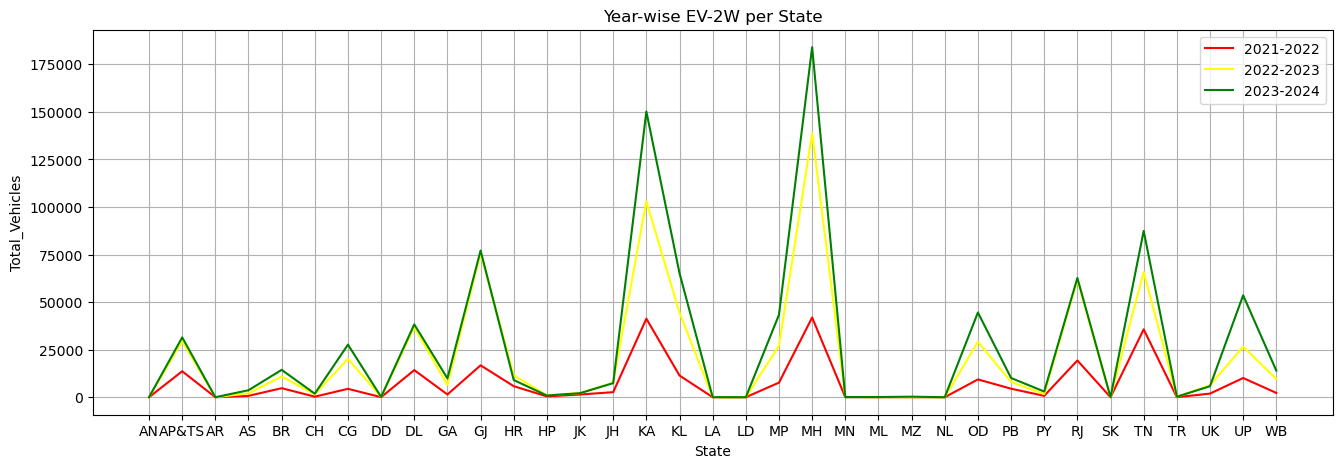

In [20]:
plt.figure(figsize=(16,5))
sns.lineplot(x=df['State_Code'], y=df['2W_22'],color='red',label='2021-2022')
sns.lineplot(x=df['State_Code'], y=df['2W_23'],color='yellow',label='2022-2023')
sns.lineplot(x=df['State_Code'], y=df['2W_24'],color='green',label='2023-2024')
plt.legend()
plt.xlabel("State")
plt.ylabel("Total_Vehicles")
plt.title("Year-wise EV-2W per State")
plt.grid(True)
plt.show()

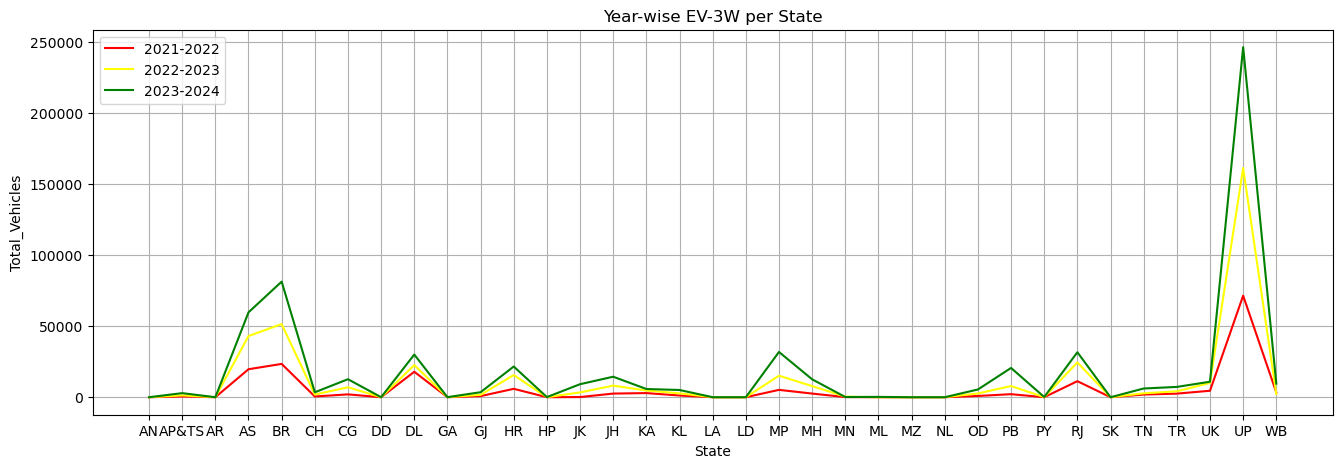

In [21]:
plt.figure(figsize=(16,5))
sns.lineplot(x=df['State_Code'], y=df['3W_22'],color='red',label='2021-2022')
sns.lineplot(x=df['State_Code'], y=df['3W_23'],color='yellow',label='2022-2023')
sns.lineplot(x=df['State_Code'], y=df['3W_24'],color='green',label='2023-2024')
plt.legend()
plt.xlabel("State")
plt.ylabel("Total_Vehicles")
plt.title("Year-wise EV-3W per State")
plt.grid(True)
plt.show()

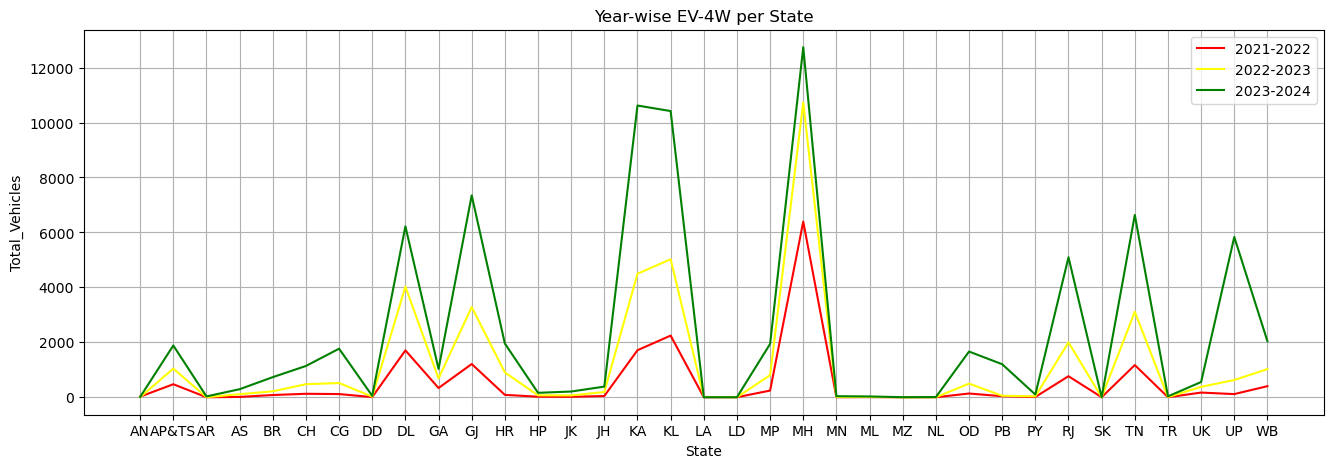

In [22]:
plt.figure(figsize=(16,5))
sns.lineplot(x=df['State_Code'], y=df['4W_22'],color='red',label='2021-2022')
sns.lineplot(x=df['State_Code'], y=df['4W_23'],color='yellow',label='2022-2023')
sns.lineplot(x=df['State_Code'], y=df['4W_24'],color='green',label='2023-2024')
plt.legend()
plt.xlabel("State")
plt.ylabel("Total_Vehicles")
plt.title("Year-wise EV-4W per State")
plt.grid(True)
plt.show()

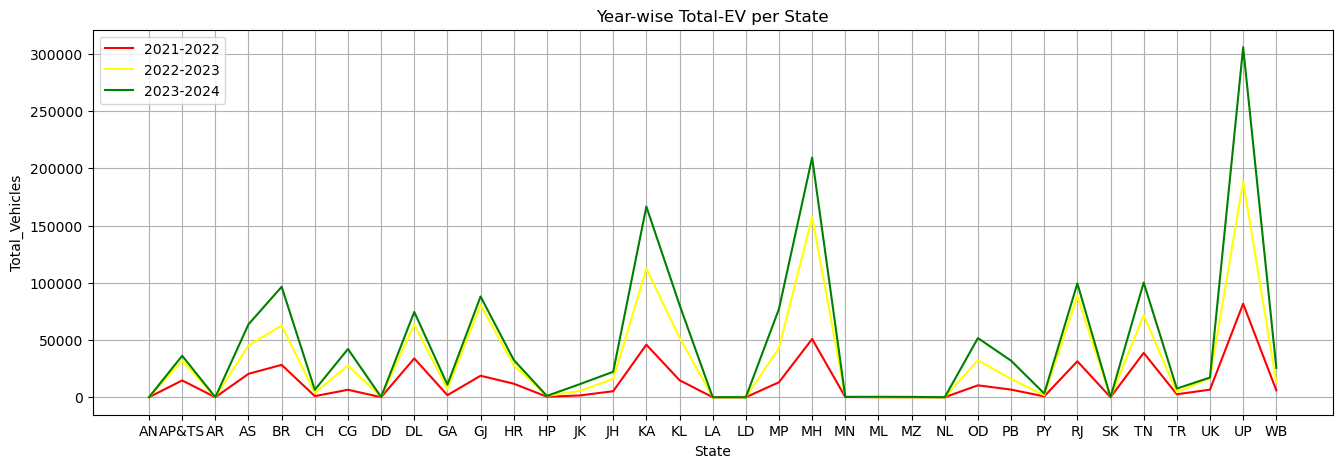

In [23]:
plt.figure(figsize=(16,5))
sns.lineplot(x=df['State_Code'], y=df['Total_22'],color='red',label='2021-2022')
sns.lineplot(x=df['State_Code'], y=df['Total_23'],color='yellow',label='2022-2023')
sns.lineplot(x=df['State_Code'], y=df['Total_24'],color='green',label='2023-2024')
plt.legend()
plt.xlabel("State")
plt.ylabel("Total_Vehicles")
plt.title("Year-wise Total-EV per State")
plt.grid(True)
plt.show()

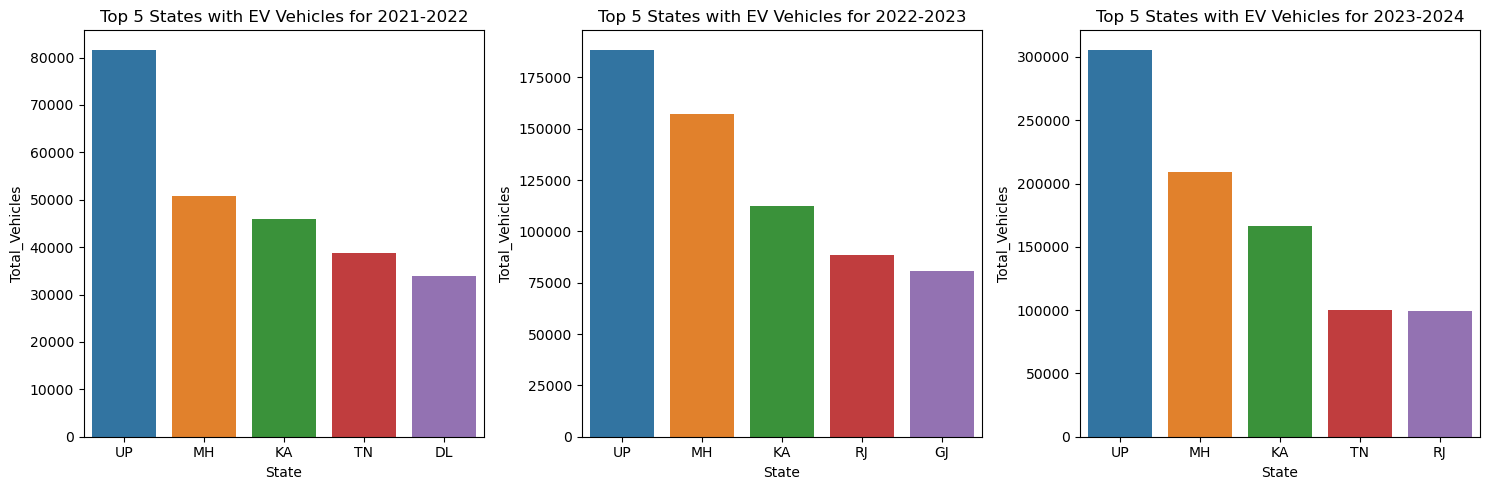

In [24]:
plt.figure(figsize=(15,5))
ax=1
for i in range(2,5):
    plt.subplot(1,3,ax)
    sns.barplot(x=df['State_Code'][np.argsort(df[f'Total_2{i}'])][:-6:-1],y=df[f'Total_2{i}'])
    plt.xlabel('State')
    plt.ylabel("Total_Vehicles")
    plt.title(f"Top 5 States with EV Vehicles for 202{i-1}-202{i}")
    ax+=1
plt.tight_layout()
plt.show()

In [25]:
#UP surpassing MH in terms of Total Vehicles(2W+3W+4W) with 3W contributing more for UP

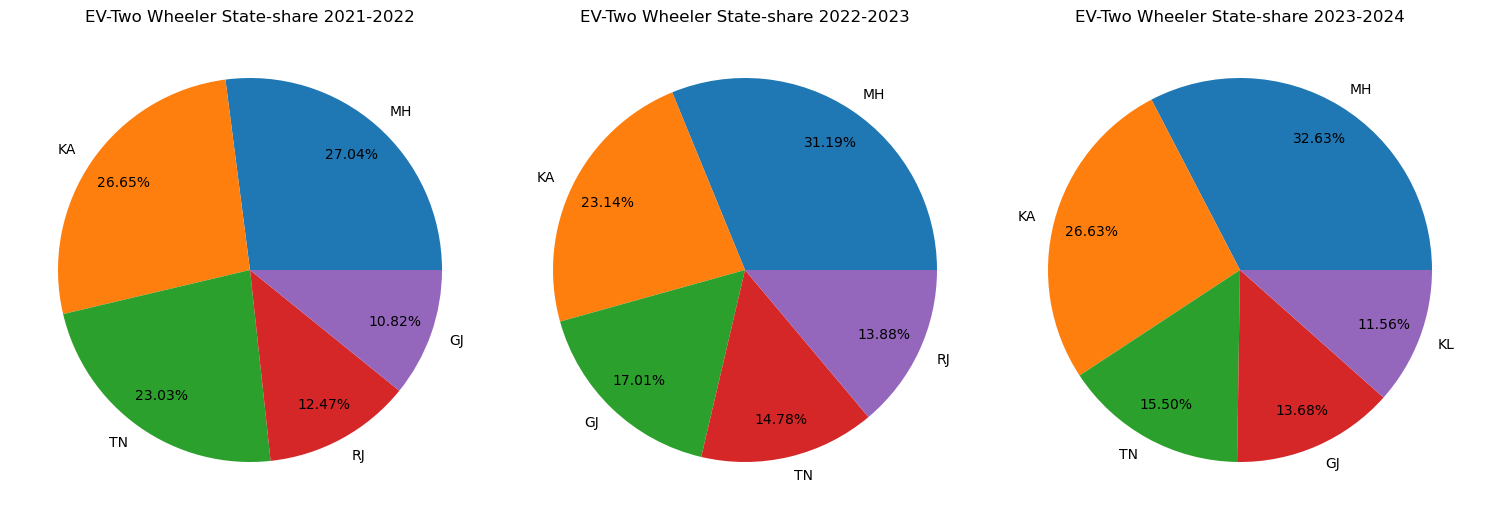

In [26]:
plt.figure(figsize=(15,15))
ax=1
for i in range(2,5):
    plt.subplot(1,3,ax)
    plt.pie(df[f'2W_2{i}'][np.argsort(df[f'2W_2{i}'])[:-6:-1]],labels=df['State_Code'][np.argsort(df[f'2W_2{i}'])[:-6:-1]],
        autopct="%1.2f%%", labeldistance=1.1, pctdistance=0.8)
    plt.title(f"EV-Two Wheeler State-share 202{i-1}-202{i}")
    ax+=1
plt.tight_layout()
plt.show()

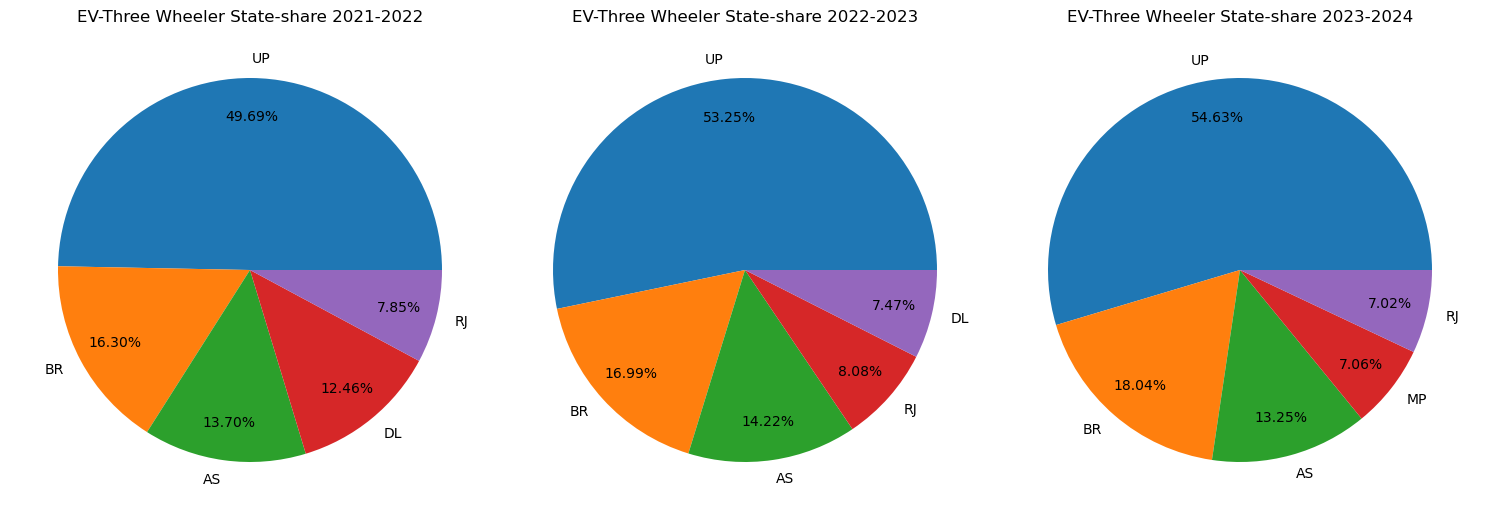

In [27]:
plt.figure(figsize=(15,15))
ax=1
for i in range(2,5):
    plt.subplot(1,3,ax)
    plt.pie(df[f'3W_2{i}'][np.argsort(df[f'3W_2{i}'])[:-6:-1]],labels=df['State_Code'][np.argsort(df[f'3W_2{i}'])[:-6:-1]],
        autopct="%1.2f%%", labeldistance=1.1, pctdistance=0.8)
    plt.title(f"EV-Three Wheeler State-share 202{i-1}-202{i}")
    ax+=1
plt.tight_layout()
plt.show()

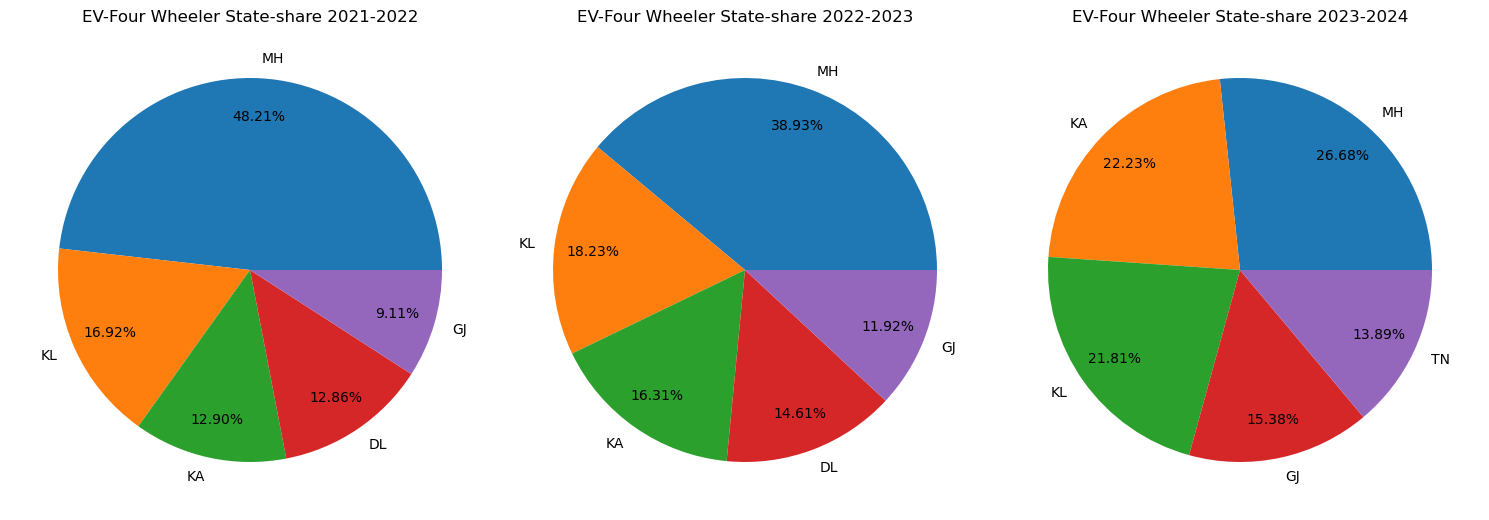

In [28]:
plt.figure(figsize=(15,15))
ax=1
for i in range(2,5):
    plt.subplot(1,3,ax)
    plt.pie(df[f'4W_2{i}'][np.argsort(df[f'4W_2{i}'])[:-6:-1]],labels=df['State_Code'][np.argsort(df[f'4W_2{i}'])[:-6:-1]],
        autopct="%1.2f%%", labeldistance=1.1, pctdistance=0.8)
    plt.title(f"EV-Four Wheeler State-share 202{i-1}-202{i}")
    ax+=1
plt.tight_layout()
plt.show()

### ii. State-wise Policies

In [29]:
state_incentives = df.iloc[:,-8:-1]
state_incentives.head()

,Capital_subsidy_2W,Capital_subsidy_4W,Scrapping_Incentives,Other_Incentives,SGST_Rem,Motor_Vehicle_Tax_Exe,Registration_Fee_Exe
0,0,0,0.0,0,0.0,0.0,0.0
1,0,0,0.0,0,100.0,0.0,100.0
2,0,0,0.0,0,0.0,0.0,0.0
3,20000,150000,0.0,1,0.0,0.0,100.0
4,20000,150000,0.0,0,0.0,0.0,0.0


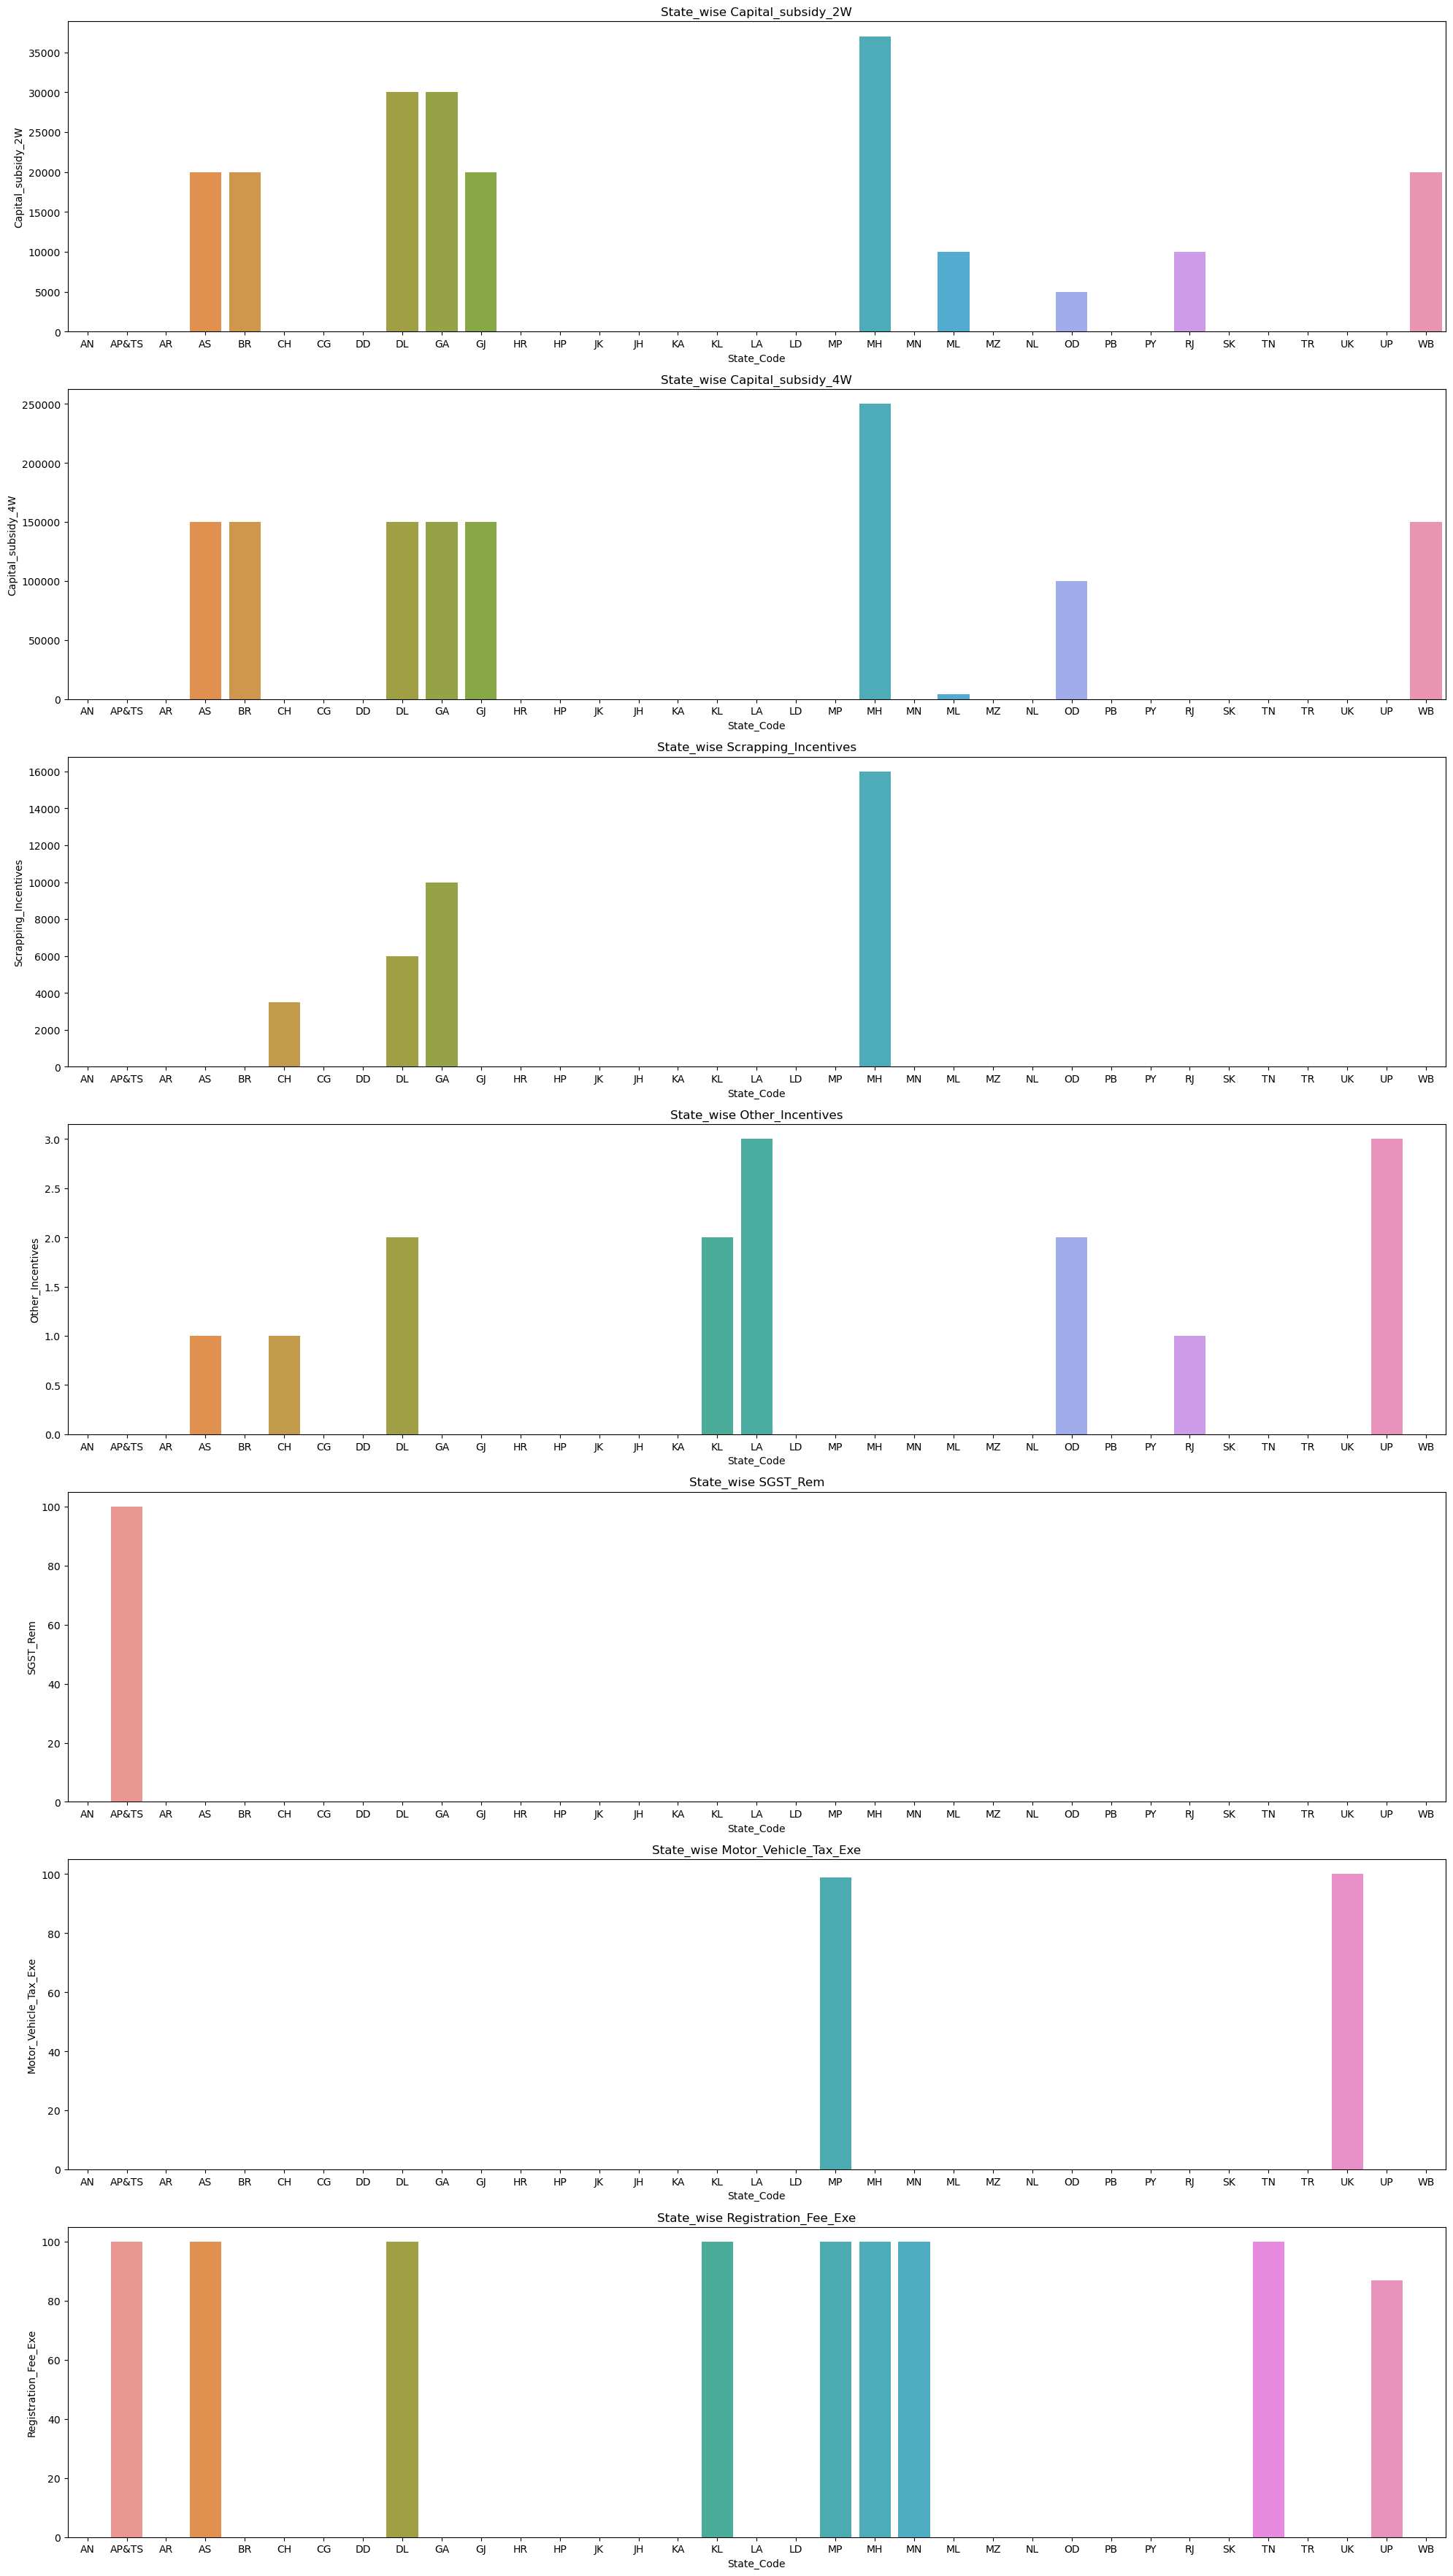

In [30]:
plt.figure(figsize=(20,40))
ax=1
for column in state_incentives.columns:
    plt.subplot(8,1,ax)
    sns.barplot(x=df['State_Code'], y=state_incentives[column])
    plt.title(f"State_wise {column}")
    ax+=1
plt.tight_layout()
plt.show()

## Data for Clustering

In [31]:
new_df = df.drop(columns=['State','State_Code','2W_22','3W_22','4W_22','2W_23','3W_23','4W_23','2W_24','3W_24','4W_24','Total_22','Total_24'])

In [32]:
#new_df = df.drop(columns=['State','State_Code','2W_22','4W_22','2W_23','4W_23','2W_24','4W_24','Total_22','Total_23','Total_24'])

In [33]:
new_df.head()

,Total_23,Capital_subsidy_2W,Capital_subsidy_4W,Scrapping_Incentives,Other_Incentives,SGST_Rem,Motor_Vehicle_Tax_Exe,Registration_Fee_Exe,Road_Tax_Exe
0,19,0,0,0.0,0,0.0,0.0,0.0,0.0
1,31822,0,0,0.0,0,100.0,0.0,100.0,100.0
2,2,0,0,0.0,0,0.0,0.0,0.0,0.0
3,45257,20000,150000,0.0,1,0.0,0.0,100.0,100.0
4,62592,20000,150000,0.0,0,0.0,0.0,0.0,0.0


In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_df_scaled = scaler.fit_transform(new_df)

## Principal Component Analysis

In [35]:
from sklearn.decomposition import PCA
pca = PCA()

transformed = pca.fit_transform(new_df_scaled)
transformed_df = pd.DataFrame(transformed, columns=[f"PC{i+1}" for i in range(len(new_df.columns))])
transformed_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-1.377560,-0.293744,0.085189,-0.315704,-0.267534,-0.124562,-0.116547,-0.039063,-0.002812
1,1.030216,3.986740,3.871203,-2.443029,1.763669,0.551496,-0.172757,0.001249,-0.003283
2,-1.377701,-0.293795,0.085280,-0.315773,-0.267521,-0.124884,-0.116539,-0.039068,-0.002805
3,2.780046,0.592051,-0.128850,-0.070076,-0.285063,-1.001412,1.587999,-0.062163,0.062340
4,0.885201,-1.698224,0.062686,-0.147911,0.457000,0.729235,1.303978,-0.064373,-0.014955
5,-0.716323,-0.299450,-0.541131,-0.252024,0.324842,-0.509798,-1.184220,-0.156879,-0.046696
6,-1.147296,-0.210359,-0.062726,-0.204450,-0.289626,0.399880,-0.130961,-0.031211,-0.014360
7,-1.376503,-0.293361,0.084510,-0.315194,-0.267636,-0.122154,-0.116614,-0.039027,-0.002865
8,4.271005,0.014314,-0.632787,0.050826,0.413168,-1.287185,0.118813,0.446001,0.016369
9,2.038829,-3.194329,0.915941,-0.309205,0.483760,-0.745871,-0.994579,0.284176,-0.012044


In [36]:
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

In [37]:
summary = pd.DataFrame(index=transformed_df.columns)
summary['standard_deviation'] = np.sqrt(pca.explained_variance_)
summary['explained_variance_ratio'] = explained_variance
summary['cum_explained_variance_ratio'] = cumulative_explained_variance

In [38]:
summary

,standard_deviation,explained_variance_ratio,cum_explained_variance_ratio
PC1,1.873475,0.378847,0.378847
PC2,1.399205,0.211315,0.590163
PC3,1.087685,0.127695,0.717858
PC4,1.042187,0.117236,0.835094
PC5,0.733802,0.058120,0.893214
PC6,0.717663,0.055592,0.948805
PC7,0.618829,0.041334,0.990140
PC8,0.227924,0.005607,0.995747
PC9,0.198507,0.004253,1.000000


In [39]:
pd.DataFrame(pca.components_, index=transformed_df.columns, columns=new_df.columns).T.style.background_gradient(cmap = 'Purples')

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Total_23,0.378469,0.137055,-0.243119,0.182861,-0.036310,0.861989,-0.023691,0.012906,-0.018980
Capital_subsidy_2W,0.427309,-0.394713,0.083596,-0.022226,0.169702,-0.093026,0.261915,0.740215,0.012499
Capital_subsidy_4W,0.420226,-0.380874,0.069135,-0.018771,0.204454,-0.070139,0.432682,-0.662766,-0.004512
Scrapping_Incentives,0.391309,-0.308673,0.154711,0.026877,-0.058310,-0.108797,-0.836170,-0.111418,-0.010437
Other_Incentives,0.180406,0.275153,-0.673293,0.016766,0.573636,-0.296775,-0.142387,0.001149,-0.027027
SGST_Rem,0.051818,0.359505,0.577683,-0.397088,0.578240,0.189039,-0.079642,0.004244,-0.014707
Motor_Vehicle_Tax_Exe,-0.072868,0.088924,0.300909,0.880127,0.282506,-0.067815,0.003188,0.004253,0.192813
Registration_Fee_Exe,0.376658,0.440265,0.158040,0.152910,-0.282191,-0.247358,0.106741,0.011412,-0.680879
Road_Tax_Exe,0.402545,0.422351,0.051250,-0.095018,-0.319091,-0.204861,0.080157,-0.008672,0.705432


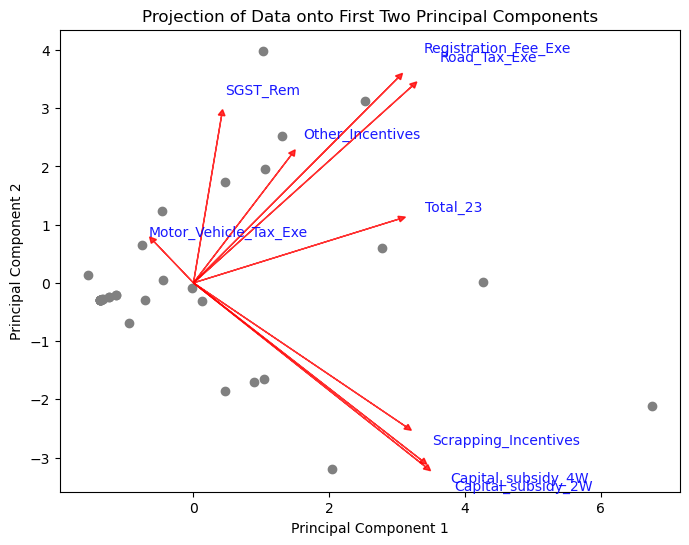

In [40]:
#scatter plot of the original data points wrt the first two Principal Components
plt.figure(figsize=(8,6))
plt.scatter(transformed[:,0], transformed[:,1], color='grey')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Projection of Data onto First Two Principal Components")

#plotting the original attributes
for i, feature in enumerate(new_df.columns):
    plt.arrow(0,0, pca.components_[0,i]*8, pca.components_[1,i]*8, color='red',  alpha=0.8, head_width=0.1, head_length=0.1)
    plt.text(pca.components_[0,i]*9, pca.components_[1,i]*9, feature, alpha=0.9, color='blue')

## Clustering States

### i. KMeans Clustering

In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [42]:
np.random.seed(45)

def kmeans_cluster(data,k_range,n_repititions):
    best_model = None
    best_k = None
    best_score = -1
    all_scores = []
    wcss = []

    for i in k_range:
        for _ in range(n_repititions):
            model = KMeans(n_clusters=i,random_state=np.random.randint(0,6000))
            cluster_labels = model.fit_predict(data)
            s_score = silhouette_score(data, cluster_labels)
            
            if s_score > best_score:
                best_score = s_score
                best_k = i
                best_model = model
                
        all_scores.append(best_score)
        wcss.append(best_model.inertia_)

    print(f"best_model:{best_model}, best_k:{best_k}, best_score:{best_score}")

    return all_scores, wcss, best_model, best_k

all_scores, wcss, best_model, best_k = kmeans_cluster(new_df_scaled,range(2,25),5)

best_model:KMeans(n_clusters=11, random_state=4384), best_k:11, best_score:0.5610021459508522


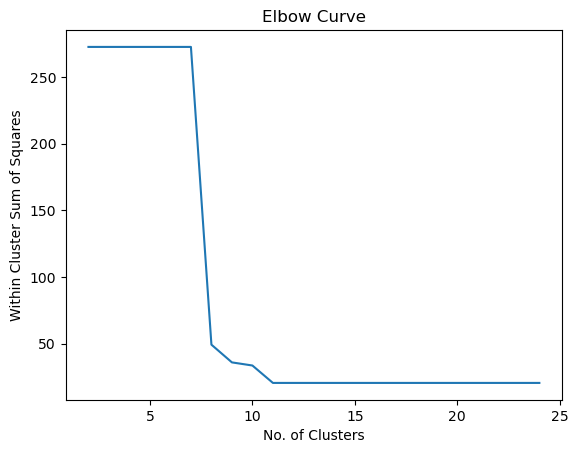

In [43]:
plt.plot(range(2,25),wcss)
plt.xlabel("No. of Clusters")
plt.ylabel("Within Cluster Sum of Squares")
plt.title("Elbow Curve")
plt.show()

#### Profiling Segments(KMeans)

In [44]:
final_model = best_model

In [45]:
df_cluster = pd.DataFrame(new_df_scaled,columns=new_df.columns)
df_cluster['Cluster'] = final_model.labels_

In [46]:
df_cluster_pca = transformed_df.copy()
df_cluster_pca['Cluster'] = final_model.labels_

In [47]:
df_profile = df_cluster.copy()
cluster_columns = df_profile.columns
data_pivot = df_profile[cluster_columns].groupby("Cluster").mean().T
data_pivot

Cluster,0,1,2,3,4,5,6,7,8,9,10
Total_23,0.408143,-0.036075,0.057776,-0.600395,-0.079362,1.910607,2.725443,1.468111,0.459493,-0.578427,-0.380949
Capital_subsidy_2W,1.360503,-0.551851,-0.551851,-0.495605,-0.551851,-0.551851,2.986004,-0.073762,1.838592,2.316680,-0.312807
Capital_subsidy_4W,1.675130,-0.525679,-0.525679,-0.522227,-0.525679,-0.525679,3.142336,-0.525679,1.675130,1.675130,0.207924
Scrapping_Incentives,-0.312699,-0.312699,-0.312699,-0.249227,-0.312699,-0.312699,4.620025,-0.312699,0.612186,2.770253,-0.312699
Other_Incentives,-0.491869,-0.491869,-0.491869,-0.424358,-0.491869,2.377369,-0.491869,0.081978,1.229673,-0.491869,2.377369
SGST_Rem,-0.171499,5.830952,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499,-0.171499
Motor_Vehicle_Tax_Exe,-0.246180,-0.246180,-0.246180,-0.246180,4.061965,-0.246180,-0.246180,-0.246180,-0.246180,-0.246180,-0.246180
Registration_Fee_Exe,-0.587669,1.731206,1.731206,-0.587669,0.571768,1.580479,1.731206,-0.587669,1.731206,-0.587669,-0.587669
Road_Tax_Exe,-0.544331,1.837117,1.837117,-0.544331,-0.544331,1.837117,1.837117,-0.544331,1.837117,-0.544331,-0.544331


In [48]:
data_pivot_mean = data_pivot.mean(axis=1).reset_index()
data_pivot_mean.columns = ['Variable', 'Values']

In [49]:
data_pivot_mean

,Variable,Values
0,Total_23,0.486760
1,Capital_subsidy_2W,0.492018
2,Capital_subsidy_4W,0.475003
3,Scrapping_Incentives,0.505849
4,Other_Incentives,0.244620
5,SGST_Rem,0.374179
6,Motor_Vehicle_Tax_Exe,0.145470
7,Registration_Fee_Exe,0.558066
8,Road_Tax_Exe,0.538145


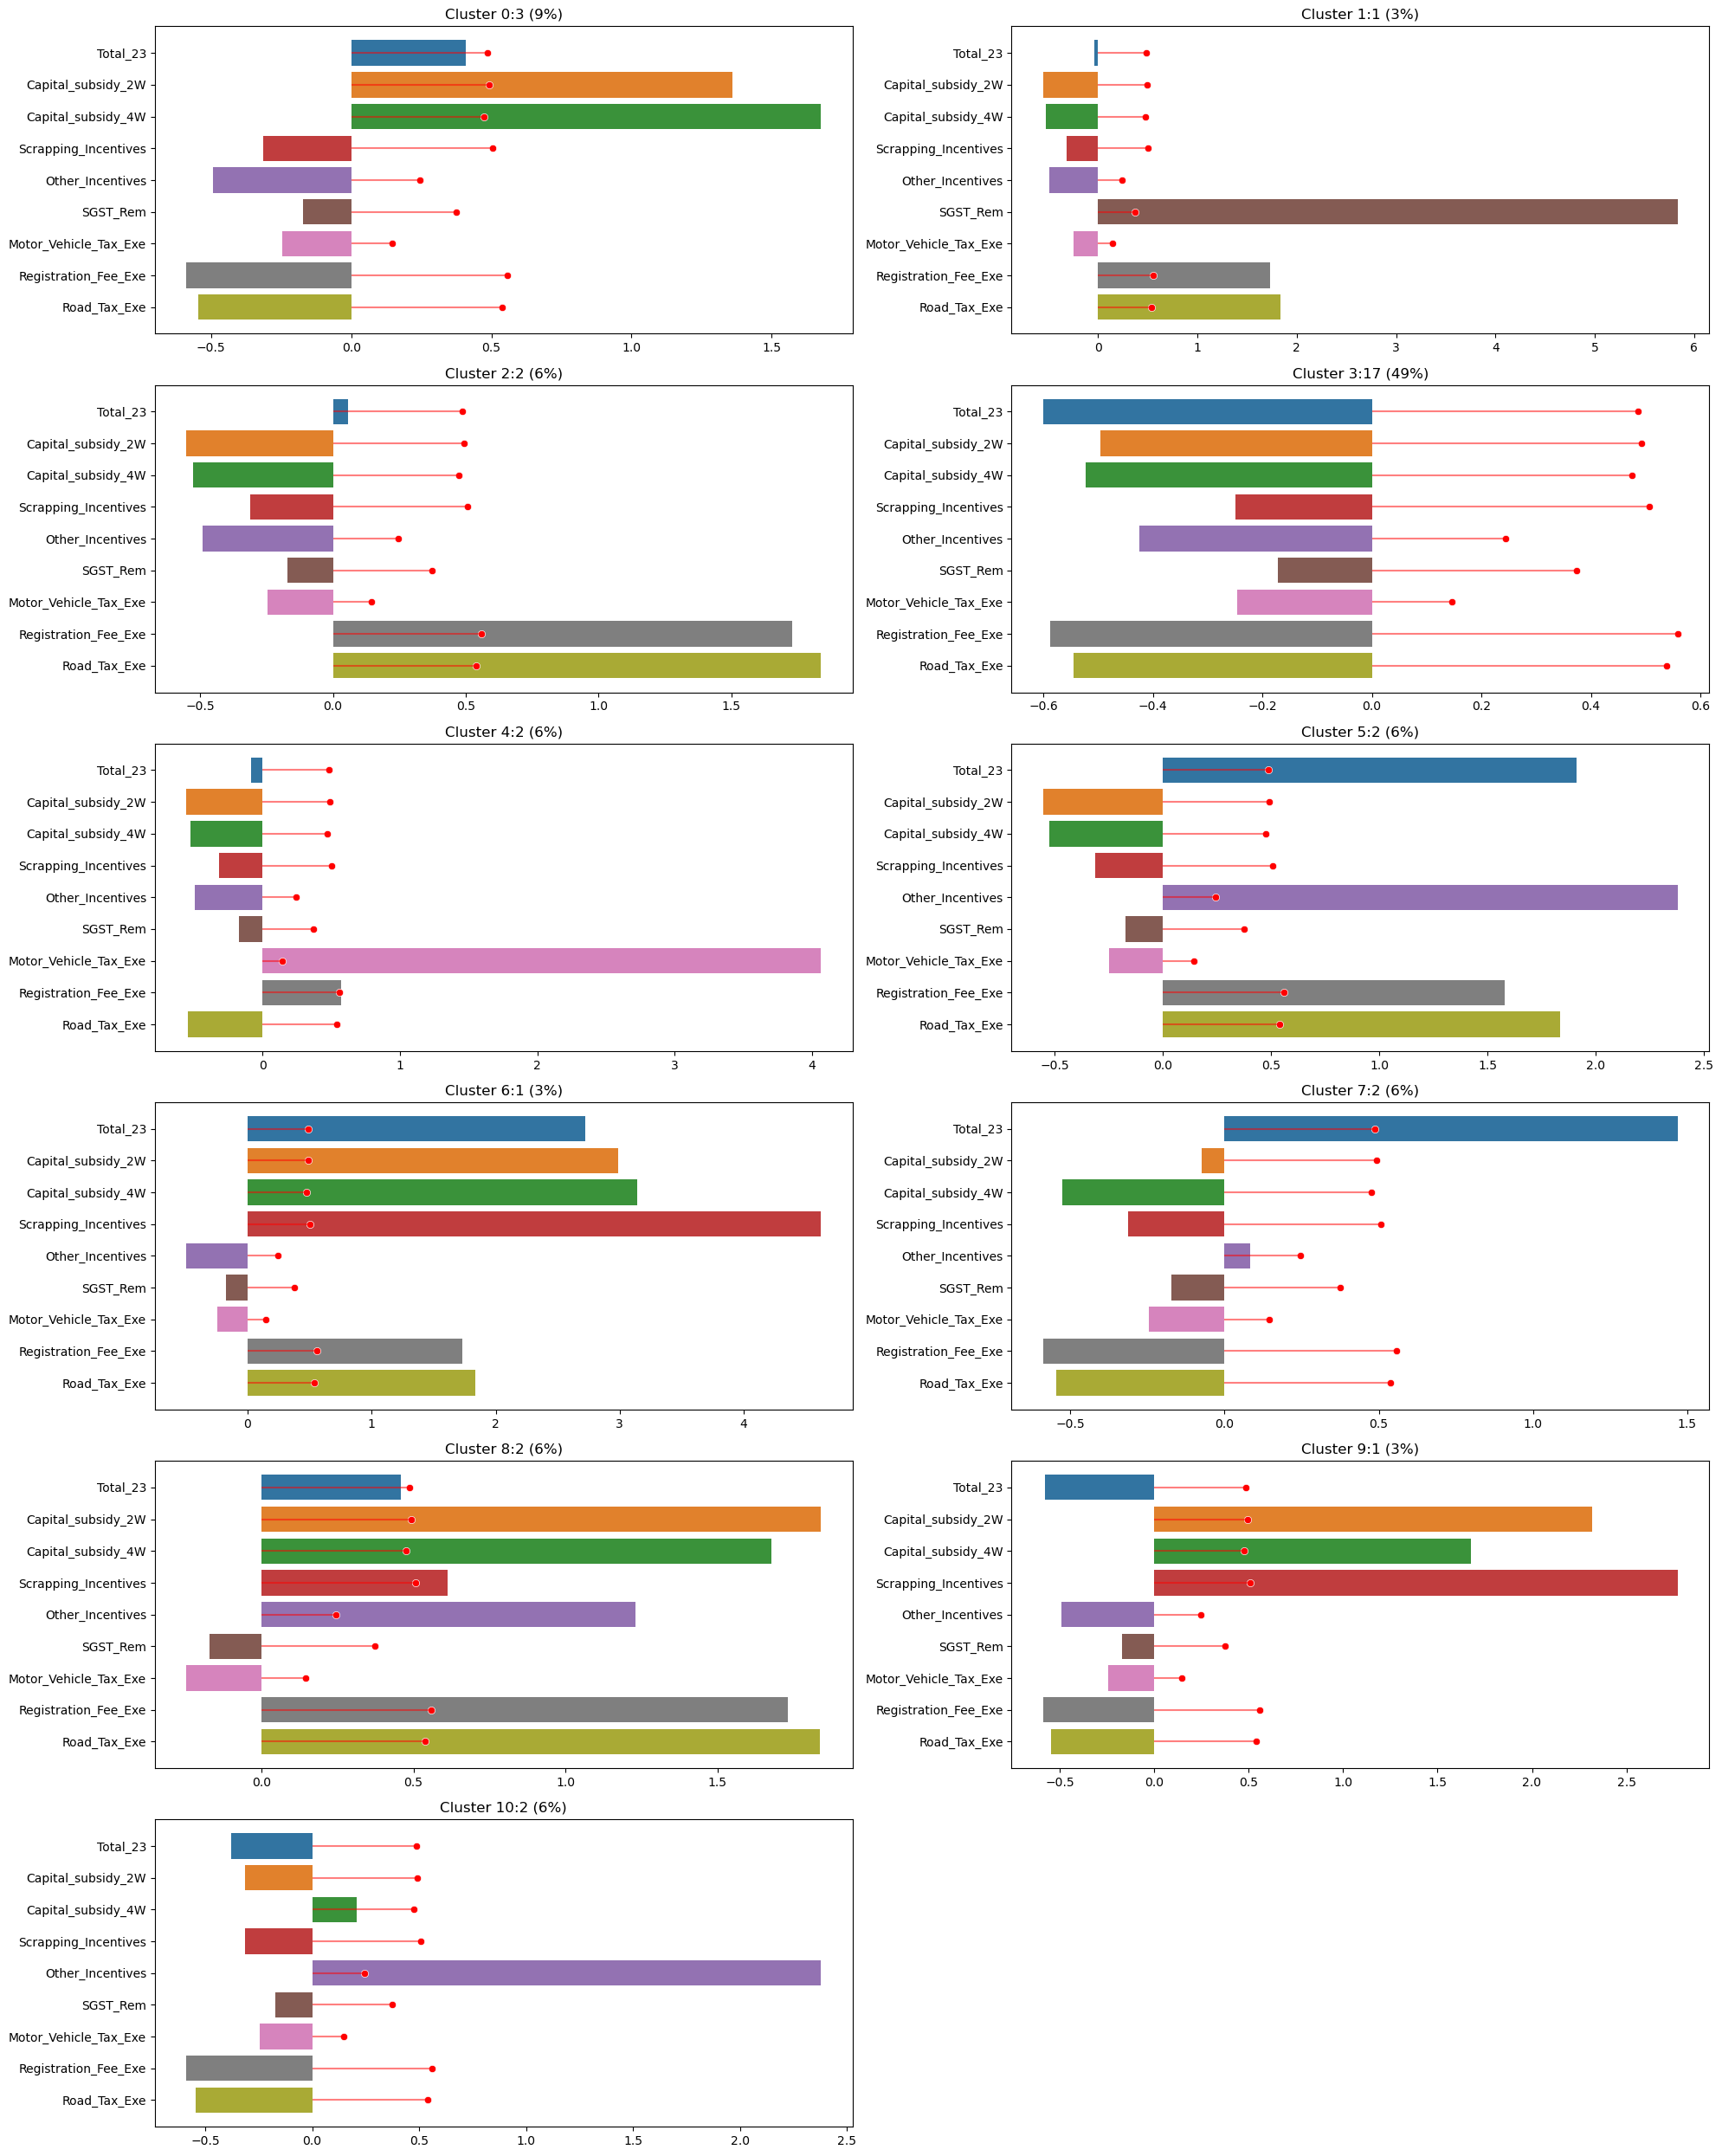

In [50]:
plt.figure(figsize=(20,25))
for i in range(11):
    plt.subplot(6,2,i+1)
    sns.barplot(data_pivot, x=i, y=data_pivot.index)
    sns.scatterplot(data_pivot_mean, x='Values', y='Variable', color='red')
    for index, row in data_pivot_mean.iterrows():
        plt.hlines(y=row['Variable'], xmin=0, xmax=row['Values'], color='red', alpha=0.5)
    if i < 11:
        i+=1

    plt.xlabel("")
    plt.ylabel("")
    plt.title(f"Cluster {i-1}:{df_profile['Cluster'].value_counts()[i-1]} ({df_profile['Cluster'].value_counts()[i-1]*100/len(df_profile):.0f}%)")

plt.tight_layout()
plt.show()

In [51]:
#df_cluster_pca['State'] = df['State']
#df_cluster_pca

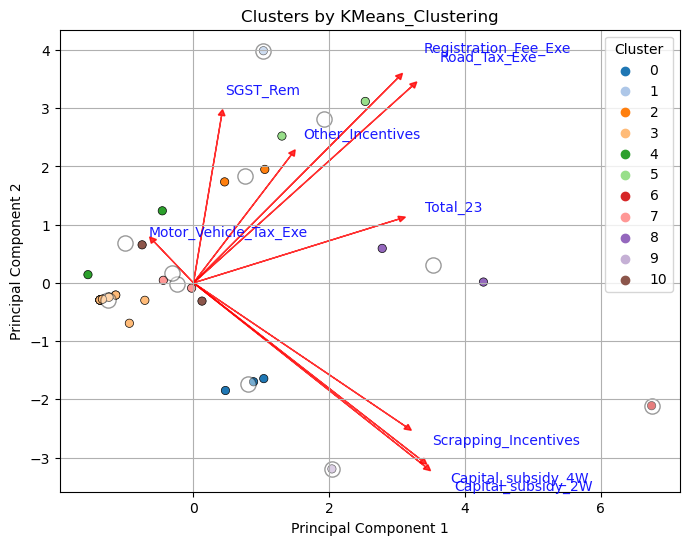

In [52]:
plt.figure(figsize=(8,6))
sns.scatterplot(df_cluster_pca, x="PC1", y="PC2", hue='Cluster',palette="tab20",edgecolor='black')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Clusters by KMeans_Clustering")

#plotting the original attributes
for i, feature in enumerate(new_df.columns):
    plt.arrow(0,0, pca.components_[0,i]*8, pca.components_[1,i]*8, color='red',  alpha=0.8, head_width=0.1, head_length=0.1)
    plt.text(pca.components_[0,i]*9, pca.components_[1,i]*9, feature, alpha=0.9, color='blue')

centers_pca = pca.transform(best_model.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], s=120, color='white', marker='o', label='Centroids',alpha=0.40, edgecolor='black')

plt.grid(True)
plt.show()

### ii. Agglomerative Hierarchical Clustering

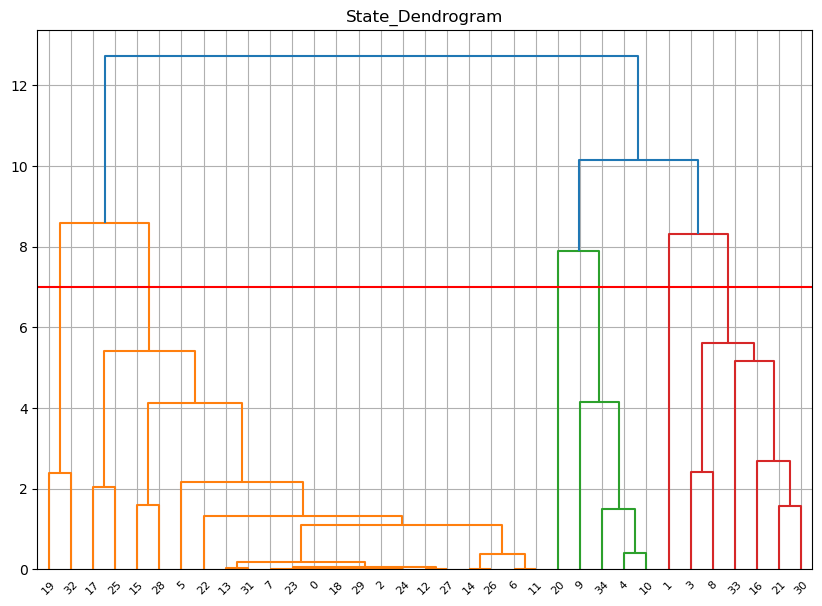

In [53]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,7))
plt.title("State_Dendrogram")
dendogram = shc.dendrogram(shc.linkage(new_df_scaled, method='ward'))
plt.hlines(y=7, xmin=0,xmax=400, color='red')
plt.grid(True)

In [54]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6)

labels_1 = cluster.fit_predict(new_df_scaled)

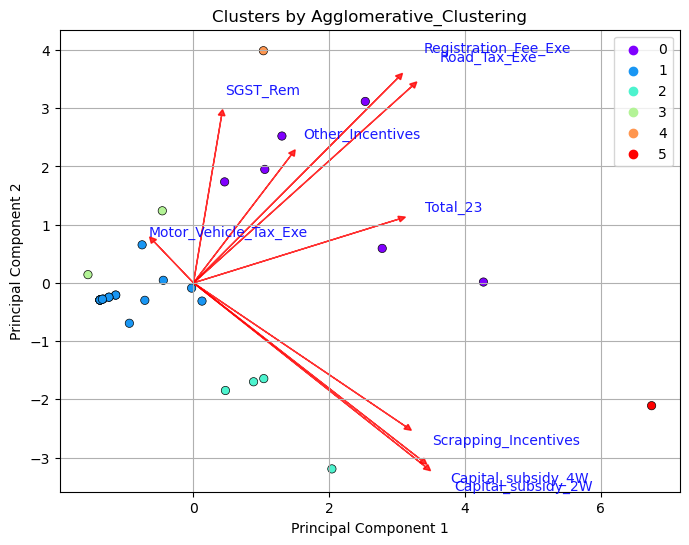

In [55]:
plt.figure(figsize=(8,6))
sns.scatterplot(transformed_df, x="PC1", y="PC2", hue=labels_1,palette="rainbow",edgecolor='black')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Clusters by Agglomerative_Clustering")

#plotting the original attributes
for i, feature in enumerate(new_df.columns):
    plt.arrow(0,0, pca.components_[0,i]*8, pca.components_[1,i]*8, color='red',  alpha=0.8, head_width=0.1, head_length=0.1)
    plt.text(pca.components_[0,i]*9, pca.components_[1,i]*9, feature, alpha=0.9, color='blue')

plt.grid(True)
plt.show()

#### Profiling Segments(Agglomerative)

In [56]:
df_2_cluster = pd.DataFrame(new_df_scaled,columns=new_df.columns)
df_2_cluster['Cluster'] = cluster.labels_

df_2_cluster_pca = transformed_df.copy()
df_2_cluster_pca['Cluster'] = cluster.labels_

df_2_profile = df_2_cluster.copy()
cluster_columns = df_2_profile.columns
data_pivot_2 = df_2_profile[cluster_columns].groupby("Cluster").mean().T

data_pivot_2_mean = data_pivot_2.mean(axis=1).reset_index()
data_pivot_2_mean.columns = ['Variable', 'Values']

In [57]:
data_pivot_2_mean

,Variable,Values
0,Total_23,0.533050
1,Capital_subsidy_2W,0.548132
2,Capital_subsidy_4W,0.586836
3,Scrapping_Incentives,0.697824
4,Other_Incentives,-0.173065
5,SGST_Rem,0.828910
6,Motor_Vehicle_Tax_Exe,0.471844
7,Registration_Fee_Exe,0.756634
8,Road_Tax_Exe,0.646393


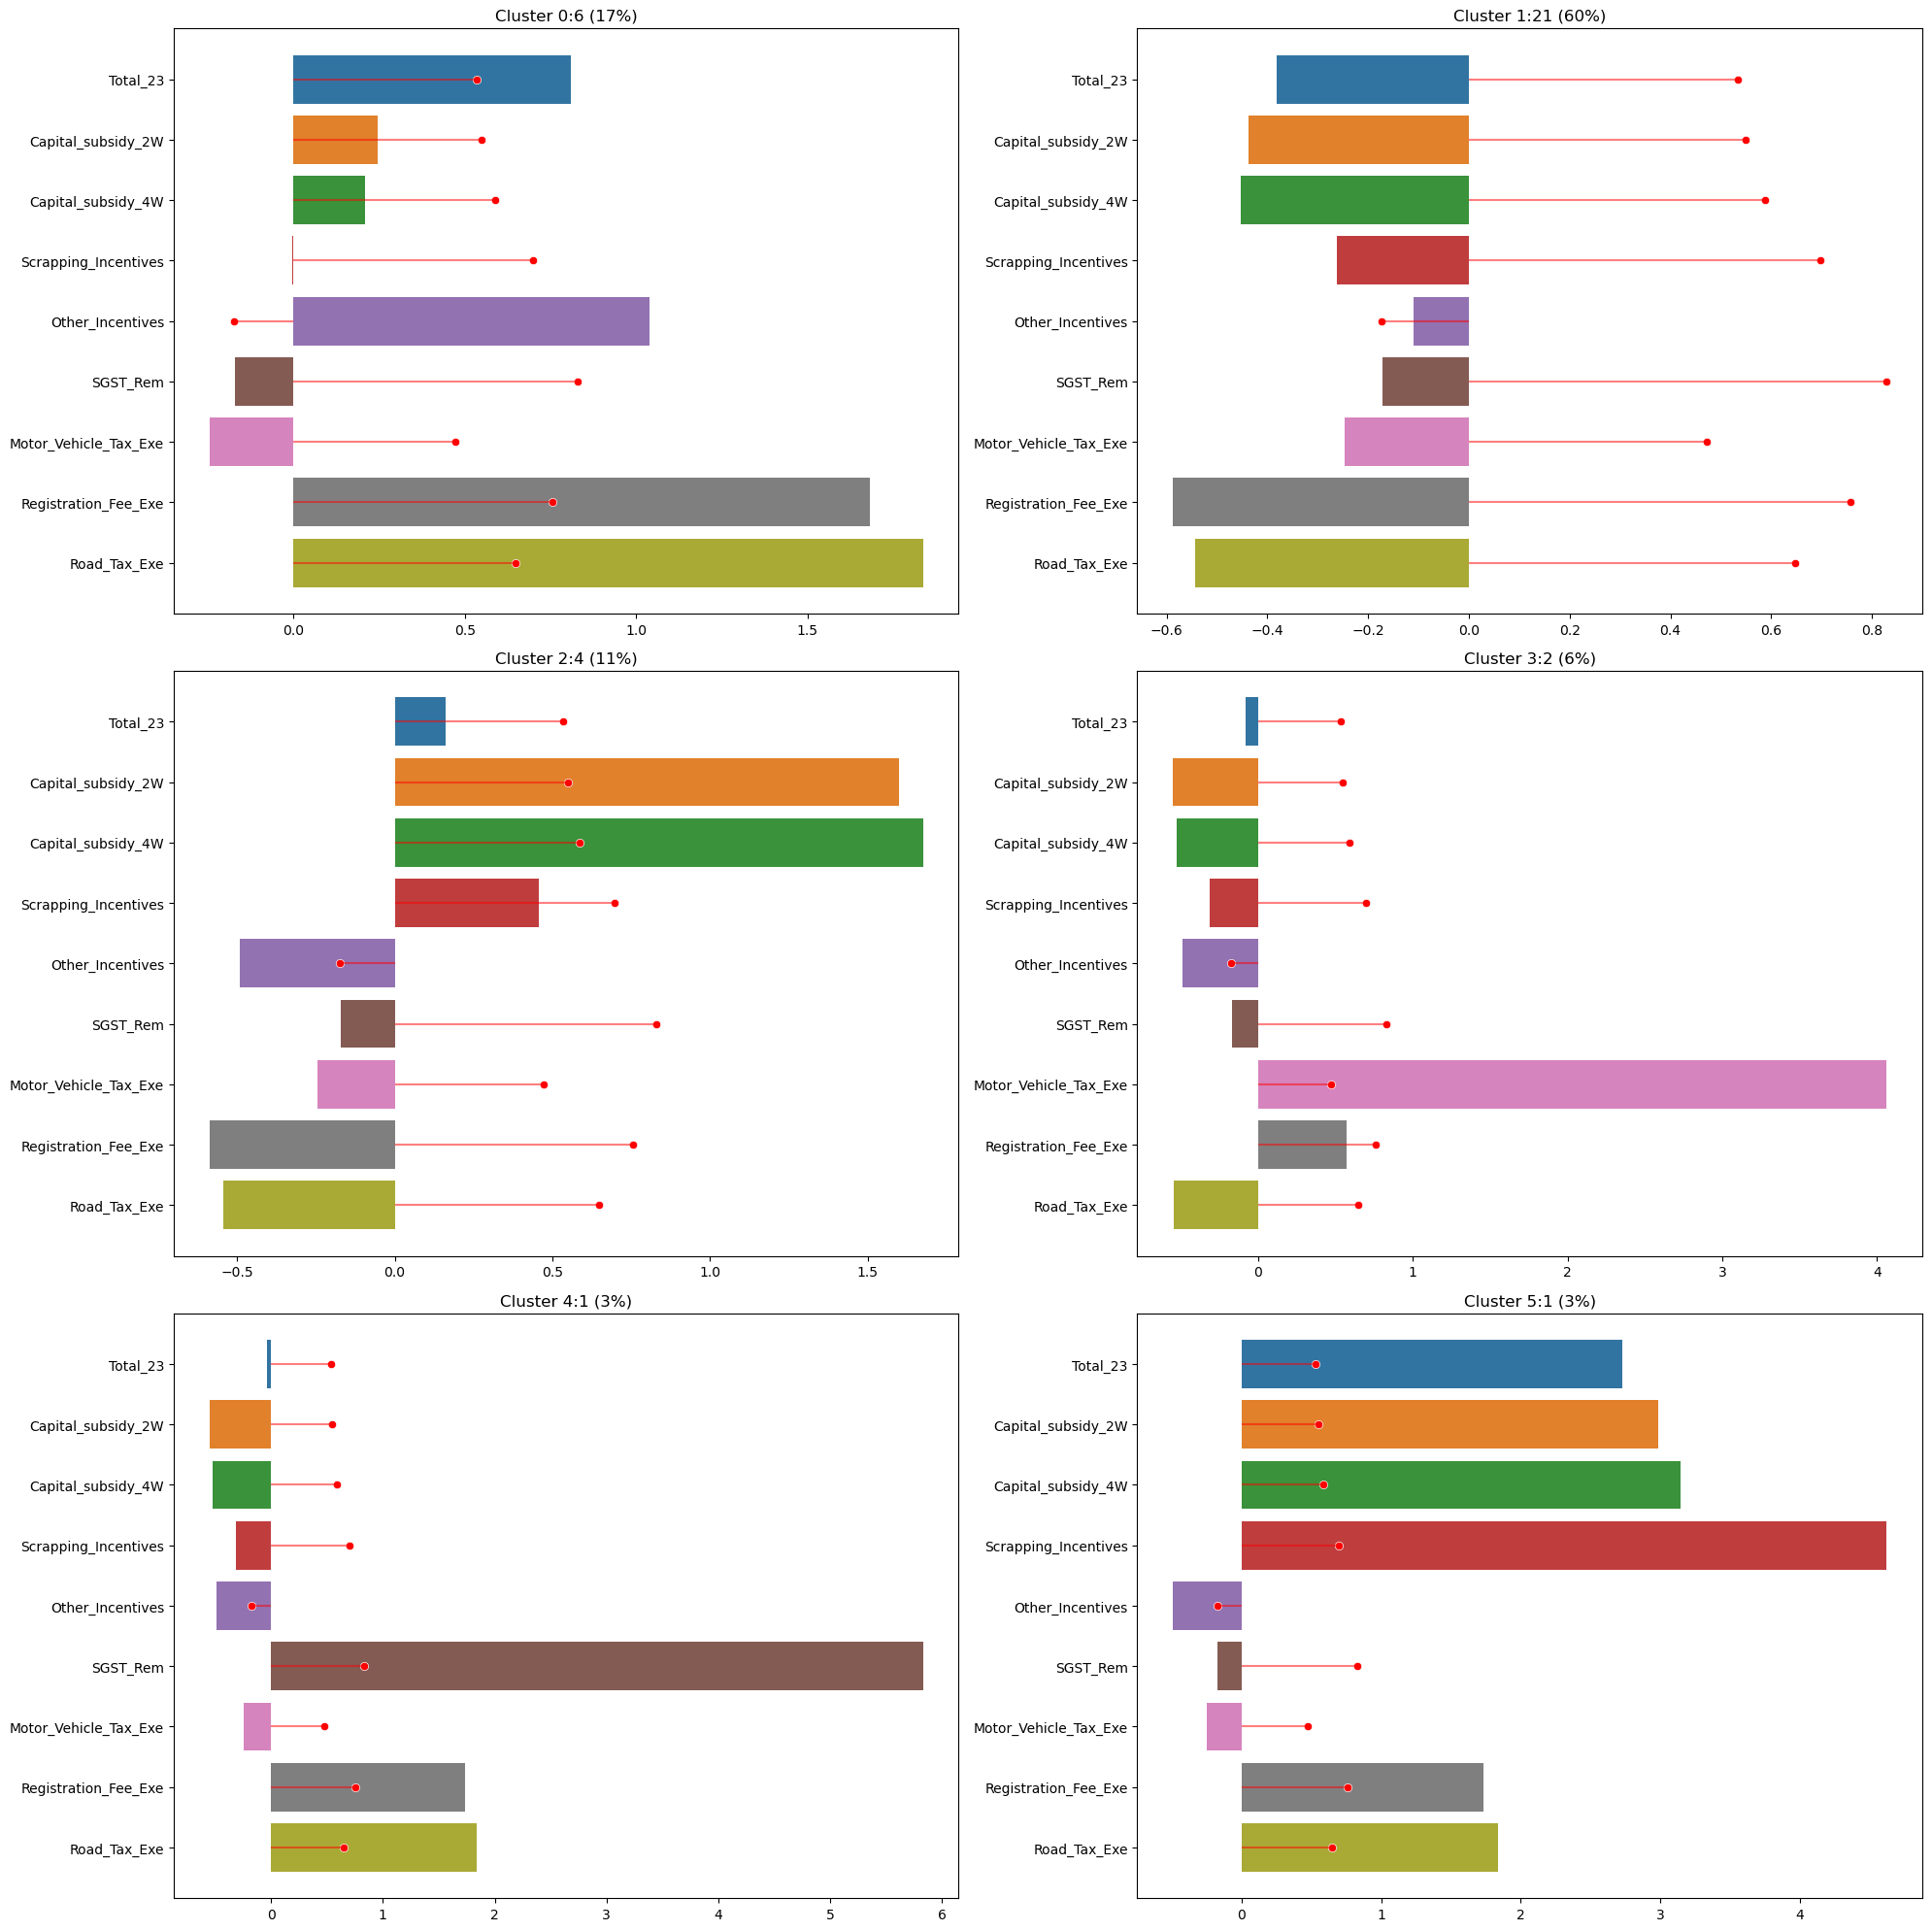

In [58]:
plt.figure(figsize=(20,20))
for i in range(6):
    plt.subplot(3,2,i+1)
    sns.barplot(data_pivot_2, x=i, y=data_pivot_2.index)
    sns.scatterplot(data_pivot_2_mean, x='Values', y='Variable', color='red')
    for index, row in data_pivot_2_mean.iterrows():
        plt.hlines(y=row['Variable'], xmin=0, xmax=row['Values'], color='red', alpha=0.5)
    if i < 6:
        i+=1

    plt.xlabel("")
    plt.ylabel("")
    plt.title(f"Cluster {i-1}:{df_2_profile['Cluster'].value_counts()[i-1]} ({df_2_profile['Cluster'].value_counts()[i-1]*100/len(df_2_profile):.0f}%)")

plt.tight_layout()
plt.show()

In [59]:
df_2_cluster_pca['State'] = df['State']
df_2_cluster_pca[["Cluster","State"]].sort_values(axis=0, by="Cluster").style.background_gradient('coolwarm')

,Cluster,State
8,0,Delhi
21,0,Manipur
33,0,Uttar Pradesh
16,0,Kerala
30,0,Tamil Nadu
3,0,Assam
29,1,Sikkim
28,1,Rajasthan
27,1,Puducherry
26,1,Punjab


* By performing Agglomerative Hierarchical Clustering we are able to capture the clusters better than the KMeans clustering. Hence, for further analysis to draw insights from the clusters so obtained, we'll stick with the former. The insights are attached in the report.